## Data Reading

In [180]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [234]:
df=pd.read_csv("penguins.csv")

In [182]:
df.shape

(344, 9)

In [183]:
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [185]:
df.describe()

,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [231]:
df=df.drop(['Unnamed: 0','year'],axis=1)

In [187]:
list(df.columns)

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

In [235]:
print(df['island'].unique())

['Torgersen' 'Biscoe' 'Dream']


In [236]:
print(df['species'].unique())

['Adelie' 'Gentoo' 'Chinstrap']


In [237]:
print(df['year'].unique())

[2007 2008 2009]


In [188]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [189]:
df[df.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [232]:
df=df.dropna(subset=['sex'])

In [191]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [192]:
df.duplicated().sum()

0

## Exploratory Data Analysis

In [193]:
pd.factorize(df['species'])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [194]:
df.apply(lambda x : pd.factorize(x)[0]).corr()['species'].sort_values()

sex                 -0.002753
body_mass_g          0.219795
bill_depth_mm        0.293945
flipper_length_mm    0.314272
island               0.450097
bill_length_mm       0.761054
species              1.000000
Name: species, dtype: float64

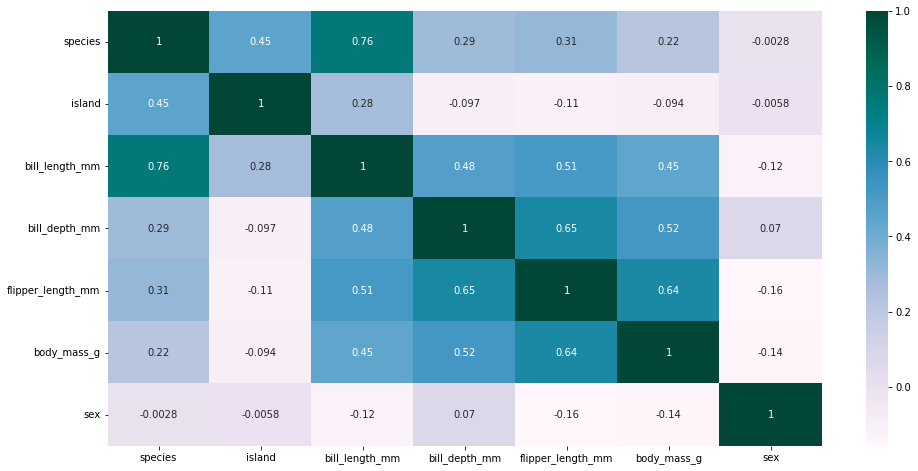

In [196]:
plt.figure(figsize=(16,8))
sns.heatmap(df.apply(lambda x : pd.factorize(x)[0]).corr(),annot=True,cmap='PuBuGn')

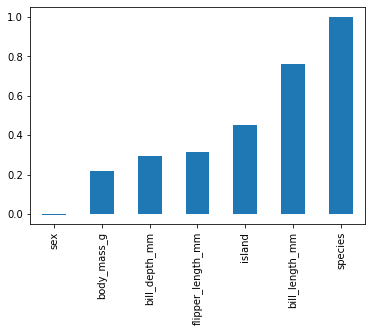

In [197]:
(df.apply(lambda x : pd.factorize(x)[0]).corr())['species'].sort_values().plot(kind='bar')

In [137]:
num_female=df['sex'].value_counts()['female']
num_male=df['sex'].value_counts()['male']
print('number of female=',num_female)
print('number of male=',num_male)

number of female= 165
number of male= 168


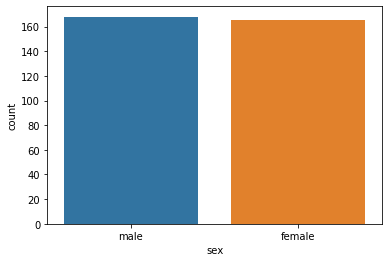

In [138]:
#another solution
sns.countplot(x='sex', data=df);

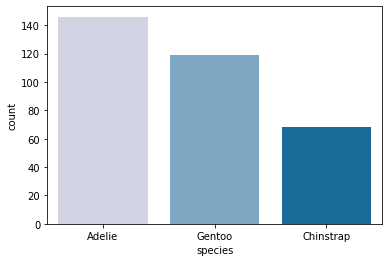

In [198]:
sns.countplot(data=df,x='species',palette='PuBu')

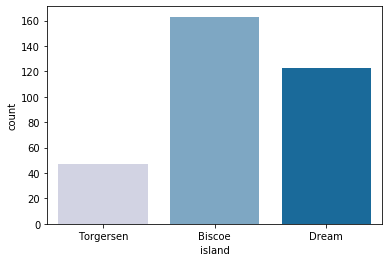

In [199]:
sns.countplot(data=df,x='island',palette='PuBu')

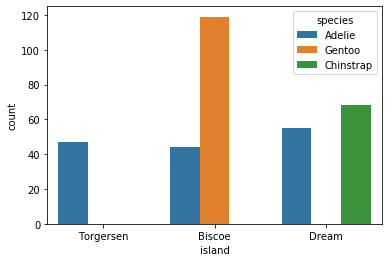

In [233]:
sns.countplot(data=df,x='island',hue='species')

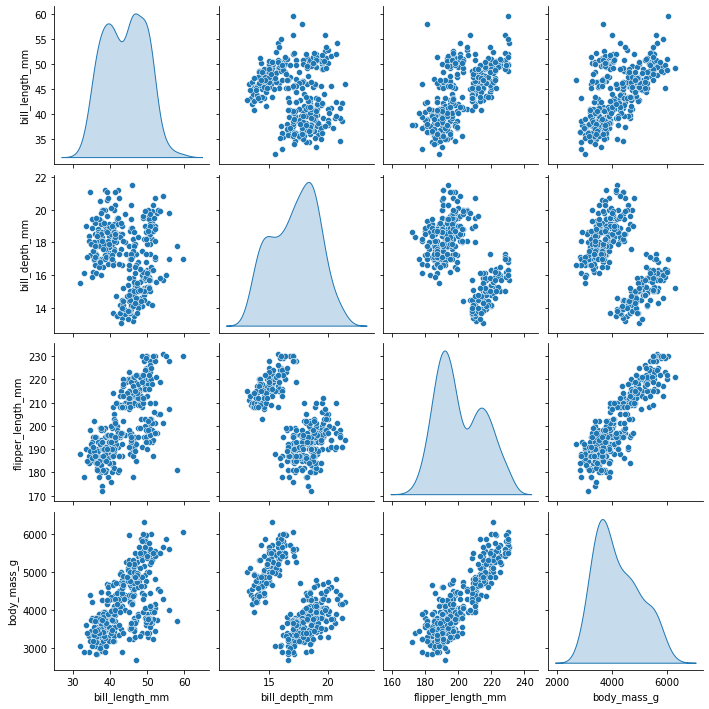

In [140]:
sns.pairplot(df, diag_kind='kde')

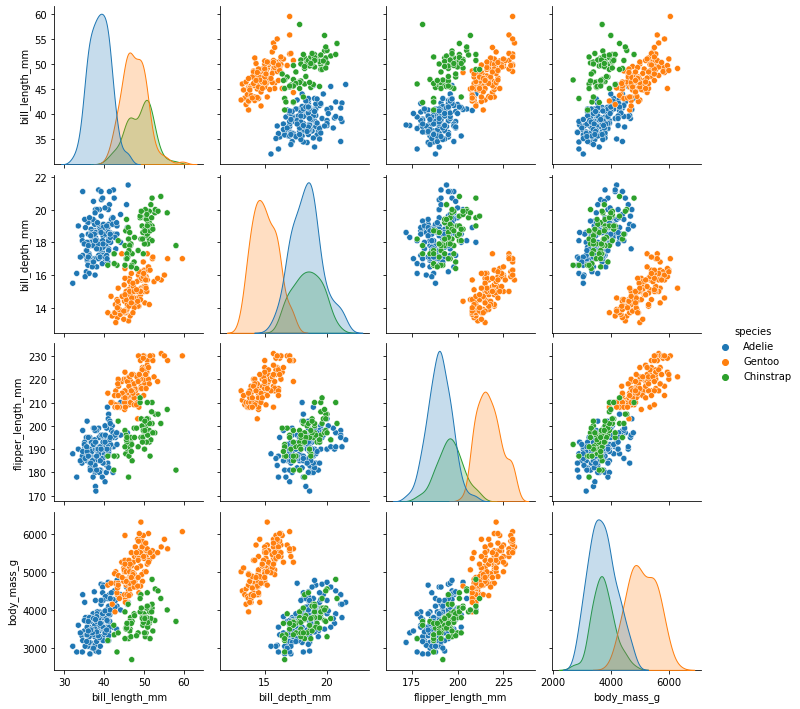

In [141]:
sns.pairplot(data=df,hue='species')

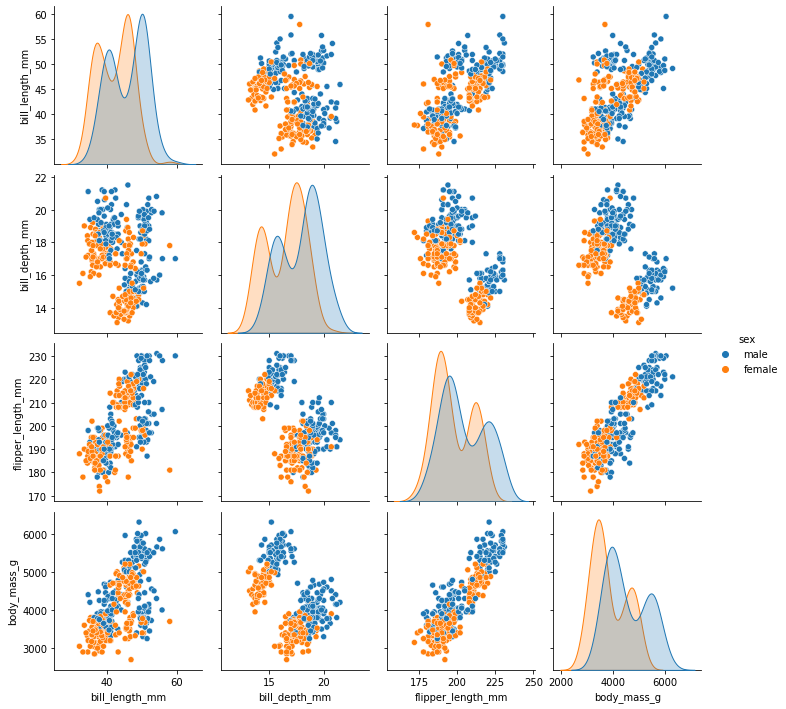

In [142]:
sns.pairplot(data=df,hue='sex')

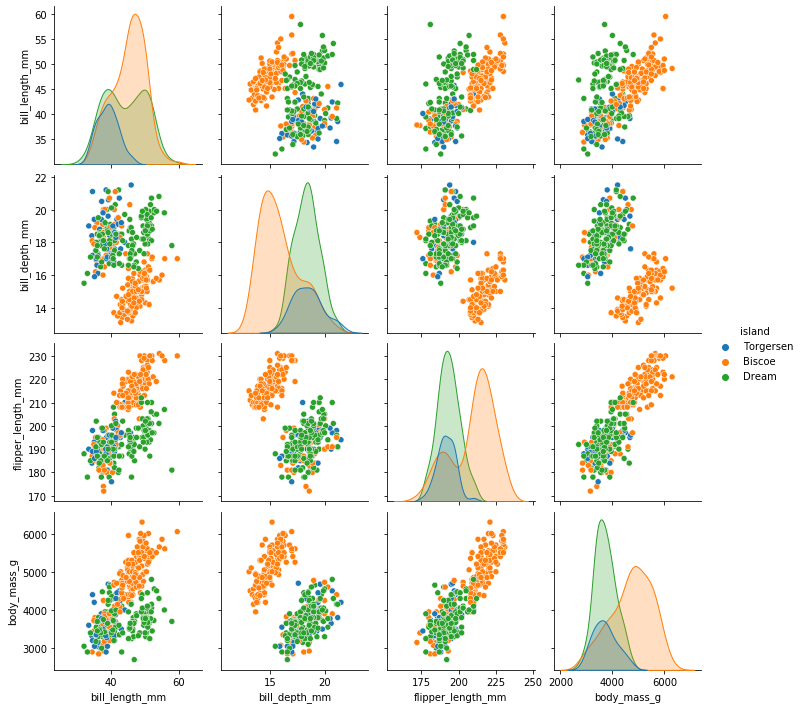

In [143]:
sns.pairplot(data=df,hue='island')

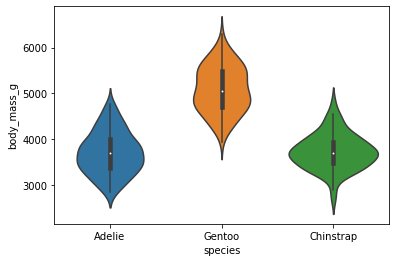

In [144]:
sns.violinplot(data=df, x="species", y="body_mass_g")

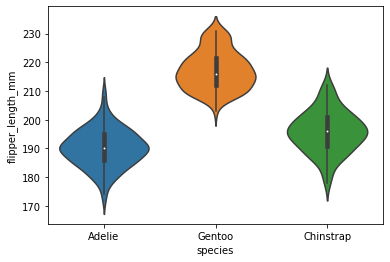

In [145]:
sns.violinplot(data=df, x="species", y="flipper_length_mm")

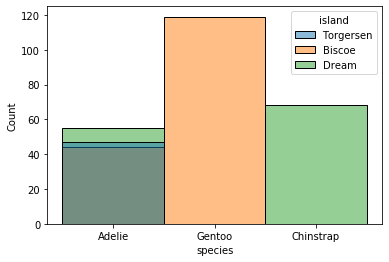

In [146]:
sns.histplot(x='species',hue='island',data=df)

In [147]:
#another solution
df.groupby("species")["island"].value_counts()

species    island   
Adelie     Dream         55
           Torgersen     47
           Biscoe        44
Chinstrap  Dream         68
Gentoo     Biscoe       119
Name: island, dtype: int64

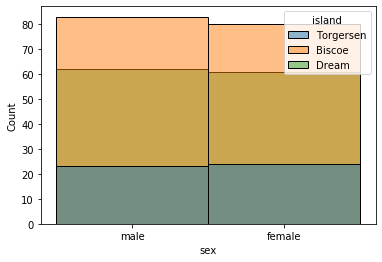

In [148]:
sns.histplot(x='sex',hue='island',data=df)

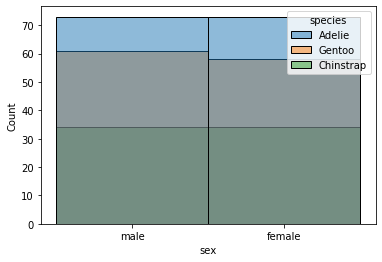

In [149]:
sns.histplot(x='sex',hue='species',data=df)

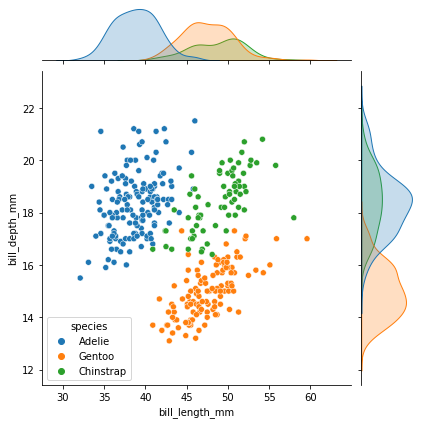

In [150]:
sns.jointplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species")

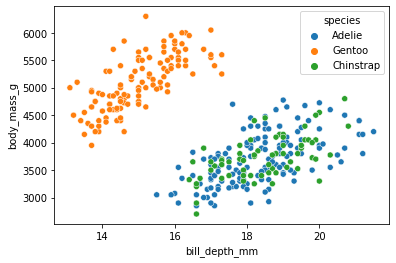

In [200]:
sns.scatterplot(data=df,x='bill_depth_mm',y='body_mass_g',hue='species')

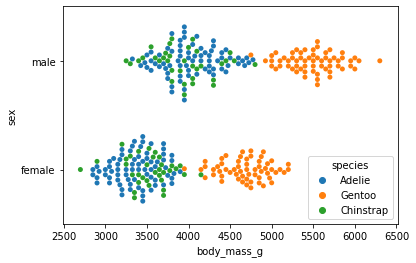

In [151]:
sns.swarmplot(data=df, x="body_mass_g", y="sex", hue="species")

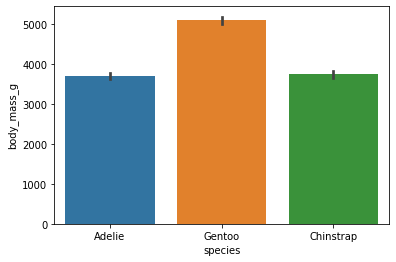

In [152]:
sns.barplot(data=df, x='species', y='body_mass_g')

## Train Test Split

In [206]:
X = df.drop('species',axis=1)
y=df['species']

In [207]:
X.shape

(333, 6)

In [208]:
y.shape

(333,)

In [209]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island,sex
0,39.1,18.7,181.0,3750.0,Torgersen,male
1,39.5,17.4,186.0,3800.0,Torgersen,female
2,40.3,18.0,195.0,3250.0,Torgersen,female
4,36.7,19.3,193.0,3450.0,Torgersen,female
5,39.3,20.6,190.0,3650.0,Torgersen,male


In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [217]:
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder
one_hot_encoder=OneHotEncoder()
one_hot_encoder= OneHotEncoder(sparse=False,dtype=int,drop='first')
categorical_columns = ['island','sex']
encoded_X_train=pd.DataFrame(one_hot_encoder.fit_transform(X_train[categorical_columns]),columns=one_hot_encoder.get_feature_names_out(categorical_columns))
encoded_X_test=pd.DataFrame(one_hot_encoder.fit_transform(X_test[categorical_columns]),columns=one_hot_encoder.get_feature_names_out(categorical_columns))

In [218]:
encoded_X_train

,island_Dream,island_Torgersen,sex_male
0,0,0,0
1,1,0,1
2,1,0,1
3,0,0,0
4,0,0,1
...,...,...,...
228,0,0,1
229,0,1,1
230,0,0,0
231,1,0,0


In [219]:
X_train.drop(['island','sex'],axis=1,inplace=True)
X_test.drop(['island','sex'],axis=1,inplace=True)

In [220]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [221]:
X_train=pd.concat([X_train,encoded_X_train],axis=1)
X_test=pd.concat([X_test,encoded_X_test],axis=1)

In [222]:
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
0,40.5,17.9,187.0,3200.0,0,0,0
1,49.2,18.2,195.0,4400.0,1,0,1
2,52.8,20.0,205.0,4550.0,1,0,1
3,37.6,17.0,185.0,3600.0,0,0,0
4,47.3,15.3,222.0,5250.0,0,0,1


In [223]:
X_test.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
0,39.5,16.7,178.0,3250.0,1,0,0
1,50.9,17.9,196.0,3675.0,1,0,0
2,42.1,19.1,195.0,4000.0,0,1,1
3,46.6,14.2,210.0,4850.0,0,0,0
4,41.1,18.2,192.0,4050.0,0,0,1


In [224]:
encoded_y_train=pd.DataFrame(one_hot_encoder.fit_transform(y_train.values.reshape(-1, 1)),columns=one_hot_encoder.get_feature_names_out(['species']))

In [225]:
encoded_y_train

,species_Chinstrap,species_Gentoo
0,0,0
1,1,0
2,1,0
3,0,0
4,0,1
...,...,...
228,0,1
229,0,0
230,0,0
231,1,0


## Data scaling

In [228]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
df_sca = pd.DataFrame(sca.fit_transform(X_train), columns=X_train.columns)
df_sca.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
0,0.305455,0.571429,0.254237,0.149254,0.0,0.0,0.0
1,0.621818,0.607143,0.389831,0.507463,1.0,0.0,1.0
2,0.752727,0.821429,0.559322,0.552239,1.0,0.0,1.0
3,0.200000,0.464286,0.220339,0.268657,0.0,0.0,0.0
4,0.552727,0.261905,0.847458,0.761194,0.0,0.0,1.0
